In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#drop the unwanted columns (data cleaning)

df2 = df1.drop(['area_type','society','balcony','availability'] , axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# find the count of NaN valued rows

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# As it is in less number compared to dataset. you can drop those rows

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# lets create a column called 'BHK' and by tokenizing the data ,lets assign the respective number of 'BHK' 

df3['bhk'] = df3['size'].apply(lambda x: int( x.split(' ')[0] ) )

C:\Users\AARIN SHEIK M\AppData\Local\Temp\ipykernel_13860\570625795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int( x.split(' ')[0] ) )


In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3['bhk']>20]

# it is immposible to have 43 bedrooms in 2400 sqft .This will be filtered out later

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df3.total_sqft.unique()

# you can find some range values ,those things should be changed to mean of the range

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply( is_float )]

#this will give the rows which does not have a valid float number  

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [16]:

def conver_sqft_to_sum(x) :
    
    tokens = x.split('-')
    
    if( len(tokens) == 2):
        tokens = [ float(x) for x in tokens]
        return np.mean(tokens)
    
    try:
        return float(x)
    except:
        return None  

# this function splits the range and calculate the mean of those two values

In [17]:
 conver_sqft_to_sum('545-5346')
    
 # testing the function   

2945.5

In [18]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply( conver_sqft_to_sum )
df4.head()

# applied it , and got the results

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df4.dropna( inplace=True)
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [20]:
df4.shape

(13200, 6)

In [21]:
# lets perform some feature engineering and dimensionality reduction technique

df5 = df4.copy()
df5['price_per_sqft'] = ( df5['price']/df5['total_sqft'] )*100000 

# we create a new column called price per sqft , and it in in Lakhs so multiplied with 100000

df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [22]:
len(df5.location.unique())

#we have too much of location to perform 'one hot encoding' (because the dimensions go higher) 

1298

In [23]:
df5.location = df5.location.apply( lambda x : x.strip() )
location_stats = df5.groupby('location')['location'].agg('count').sort_values( ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [24]:
len( location_stats[location_stats<=10])

# Hence , we can see here , that there are 1047 locations which have less than 10 stats

1047

In [25]:
loc_stats_lessthan10 = location_stats[location_stats<=10]
loc_stats_lessthan10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [26]:
len(df5.location.unique())

# this is total number of unique location in which 1047 locations have less than 10 stats

1287

In [27]:
df5.location = df5.location.apply( lambda x : 'other' if x in loc_stats_lessthan10 else x)
len( df5.location.unique() )

# Hence, we name it as 'others' as location due to less stats

241

In [28]:
# Lets us do outlier deduction and removal :

# Outliers are the data ,which is not relavent to dataset or it maybe a data error in dataset (It shows extreme variation in dataset).
# Eg : we saw it previous ,that we got 43 BHK in 2400 sqft land

df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
# If we consider a threshold of sqft required per bedroom. We can remove those data rows which are less than given threshold

# finding those data which is less than threshold = 300 sqft per bedroom

df5[(df5['total_sqft']/df5['bhk'])<300]

# we see that 744 rows are found (data errors / anomaly)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [30]:
df6 = df5[ ~( (df5['total_sqft']/df5['bhk'])<300 ) ]
df6.head()

# we removed those datasets

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
df6.price_per_sqft.describe()

# we can see that a minimal price_per_sqft in bangalore = 267.83 and maximal = 176470.58. These are extreme cases (rare cases) ,hence we remove these data because we are building a generic model (using std deviation)

# we do this by calculating 'mean' and 'one-standard deviation'
# and we elimate the data which are beyond 'one-standard deviation'

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
df6.shape

(12456, 7)

In [33]:

# assuming that our data is in normal distribution

# this function removes those price_per_sqft data rows which are less (m+st) and more than (m-st)
def remove_pps_outlier( df ) :
    
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location') :
        
        m = np.mean( subdf.price_per_sqft ) 
        st = np.std( subdf.price_per_sqft )
        
        reduced_df = subdf[ (subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st)) ]
        df_out = pd.concat( [df_out , reduced_df] ,ignore_index=True )
    
    return df_out
        
    
df7 = remove_pps_outlier( df6 )
df7.shape
    
 # we successfully removed nearly 2000 outlier   

(10242, 7)

In [34]:

def plot_scatter_chart( df , loc ):
    
    bhk2 = df[ (df.location==loc) & (df.bhk==2) ]
    bhk3 = df[ (df.location==loc) & (df.bhk==3) ]
    
    matplotlib.rcParams['figure.figsize']=(15,10)
    
    plt.scatter( bhk2.total_sqft , bhk2.price , color='blue' , label='2 BHK' , s=50 )
    plt.scatter( bhk3.total_sqft , bhk3.price , color='green' , label='3 BHK' , s=50 , marker='+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(loc)
    plt.legend()
    

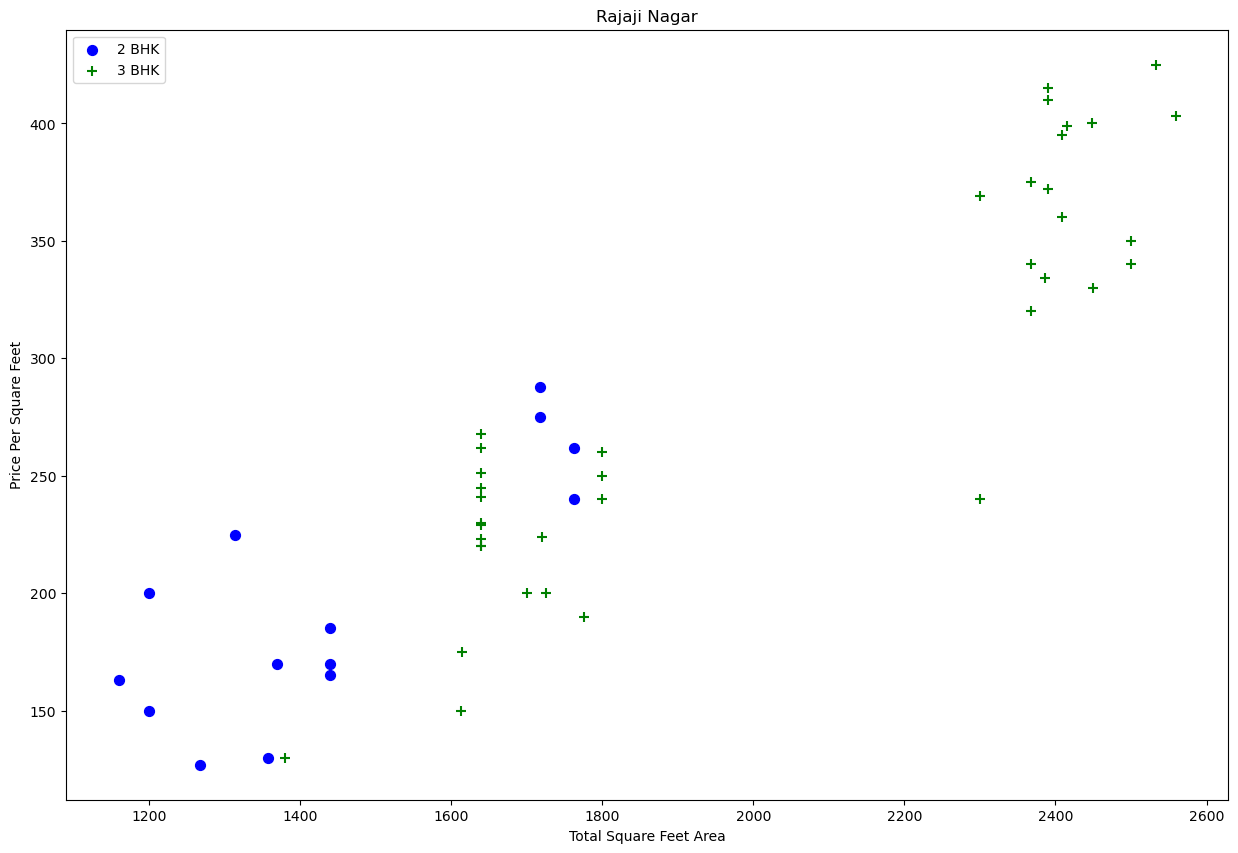

In [35]:
plot_scatter_chart( df7 , 'Rajaji Nagar') 

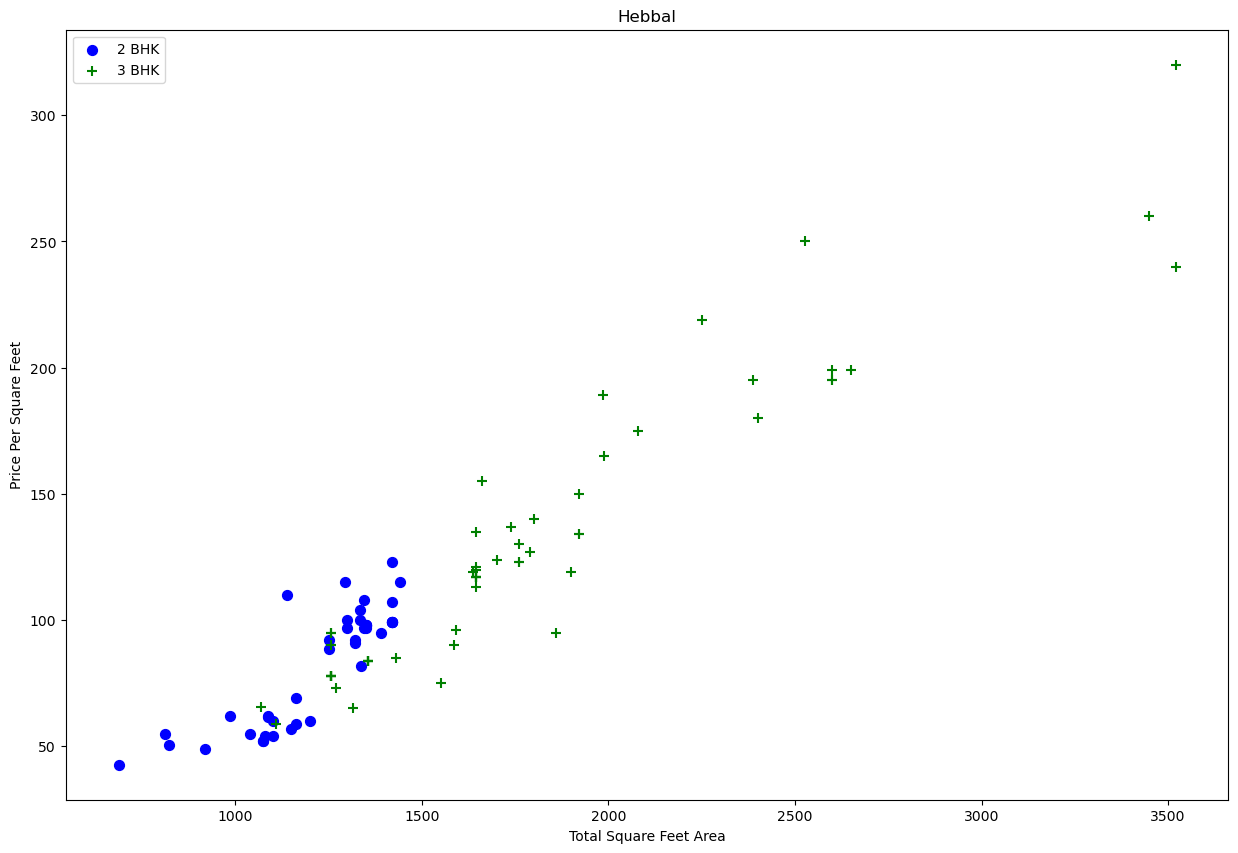

In [36]:
plot_scatter_chart( df7 , 'Hebbal') 



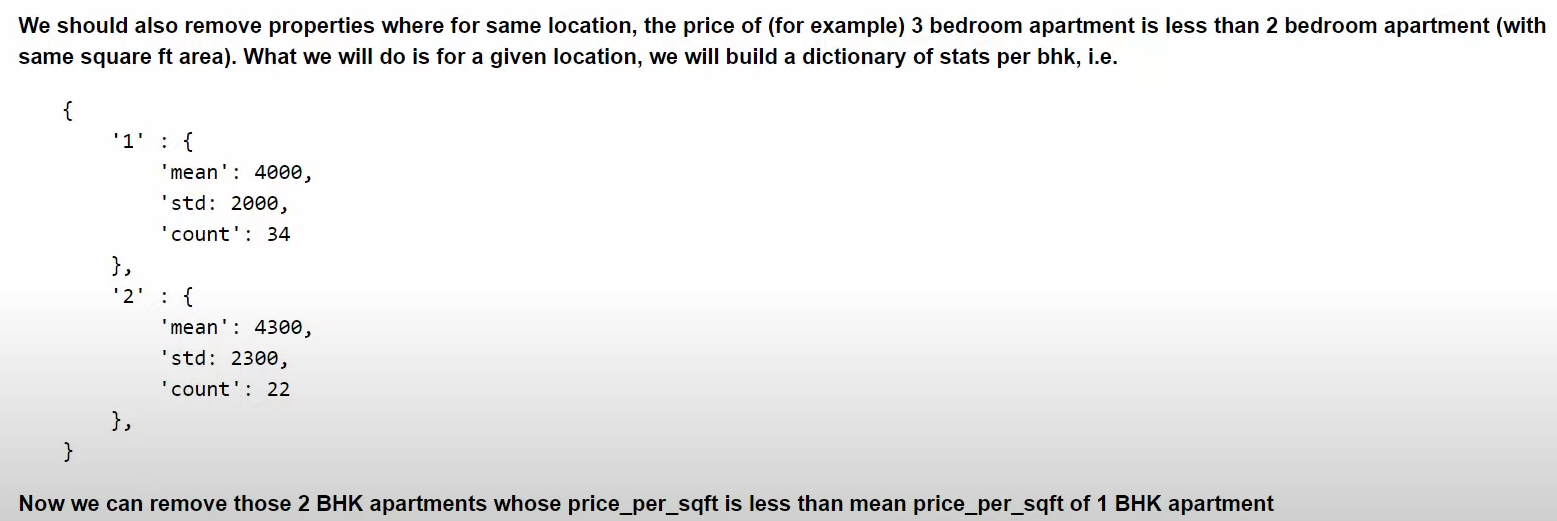

In [37]:

def remove_bhk_outliers( df ) :
    
    exclude_indices = np.array([])
    
    for loc , loc_df in df.groupby('location') :
        
        bhk_stats = {}
        for bhk , bhk_df in loc_df.groupby('bhk') :
            bhk_stats[bhk] = {
                'mean' : np.mean( bhk_df.price_per_sqft ) ,
                'std' : np.std( bhk_df.price_per_sqft ) ,
                'count' : bhk_df.shape[0]
            }
        
        for bhk , bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5 :
                exclude_indices = np.append( exclude_indices , bhk_df[ bhk_df.price_per_sqft<(stats['mean'])].index.values )

    return df.drop( exclude_indices , axis='index')


In [38]:
df8 = remove_bhk_outliers( df7 )
df8.shape

(7317, 7)

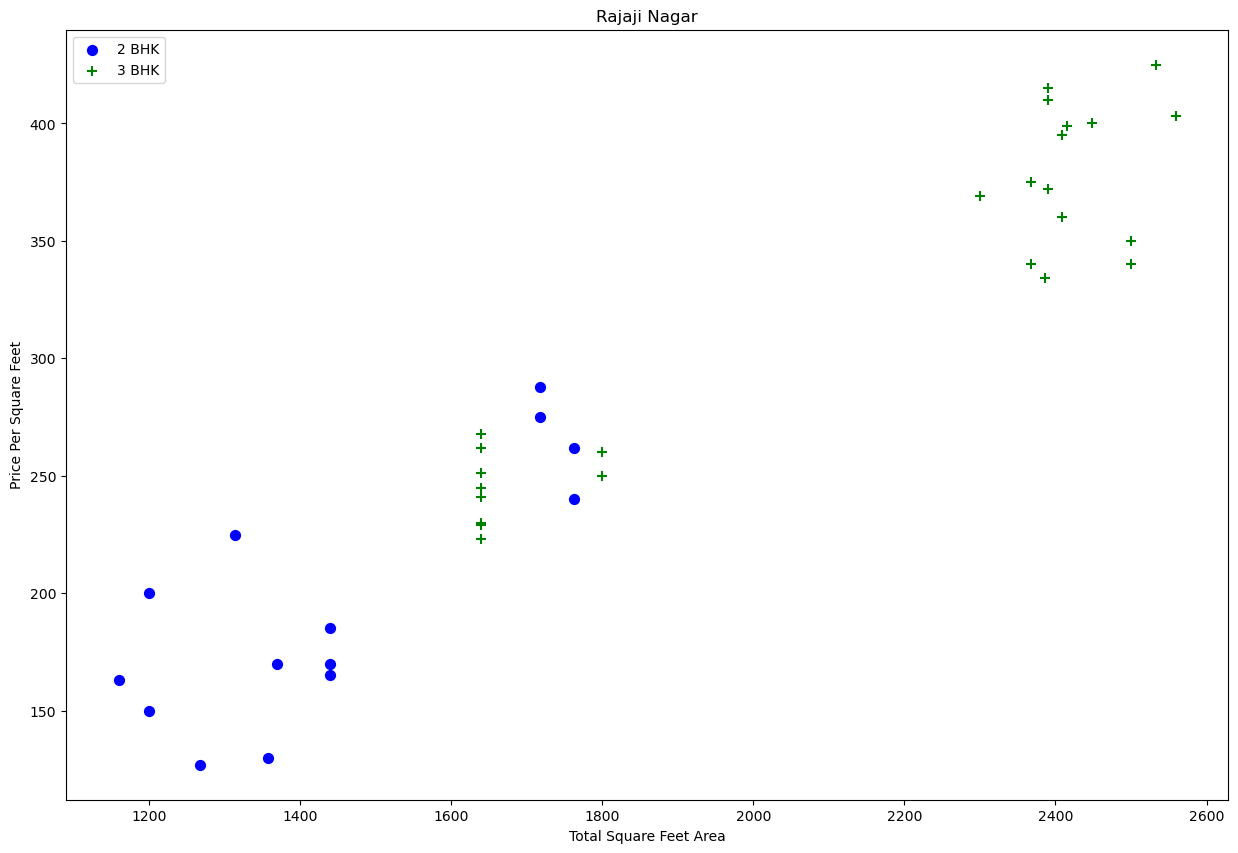

In [39]:
plot_scatter_chart( df8 , 'Rajaji Nagar') 

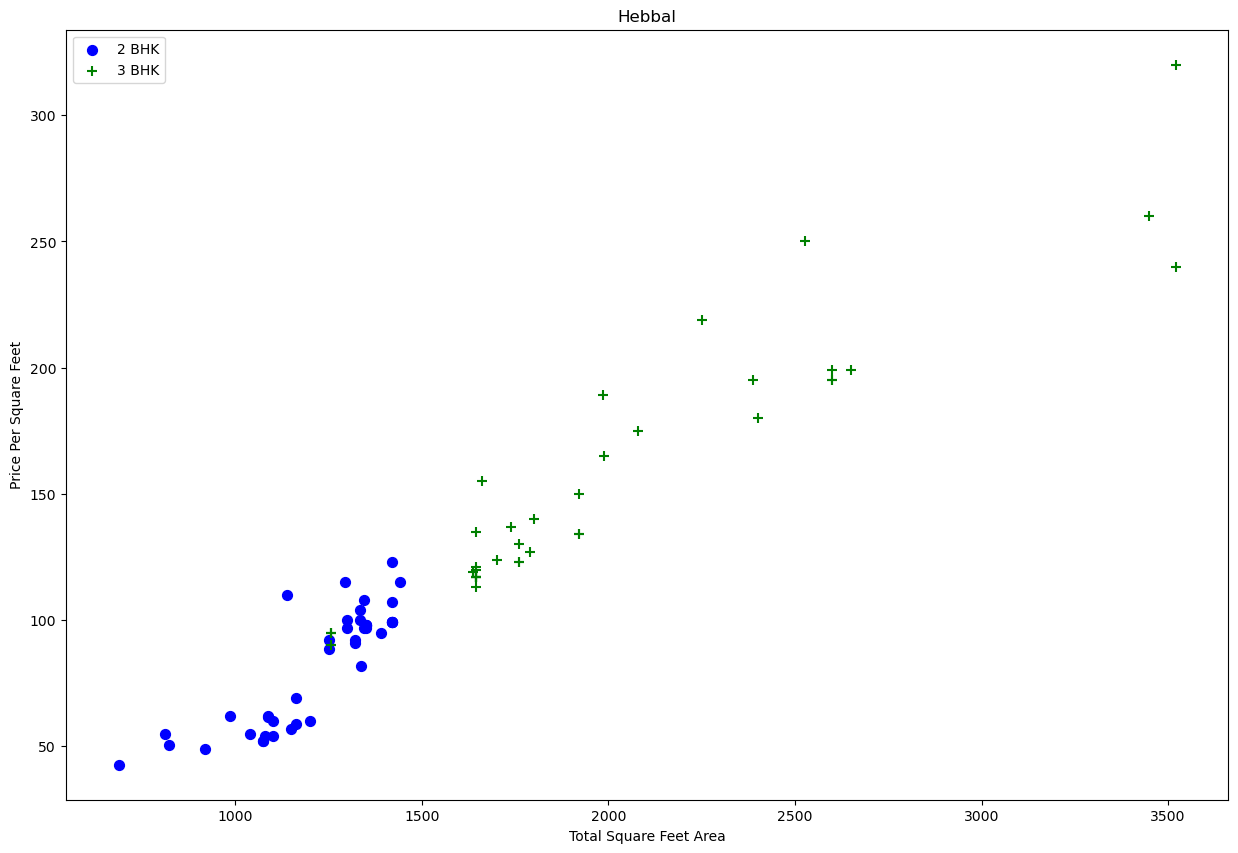

In [40]:
plot_scatter_chart( df8 , 'Hebbal') 

Text(0, 0.5, 'count')

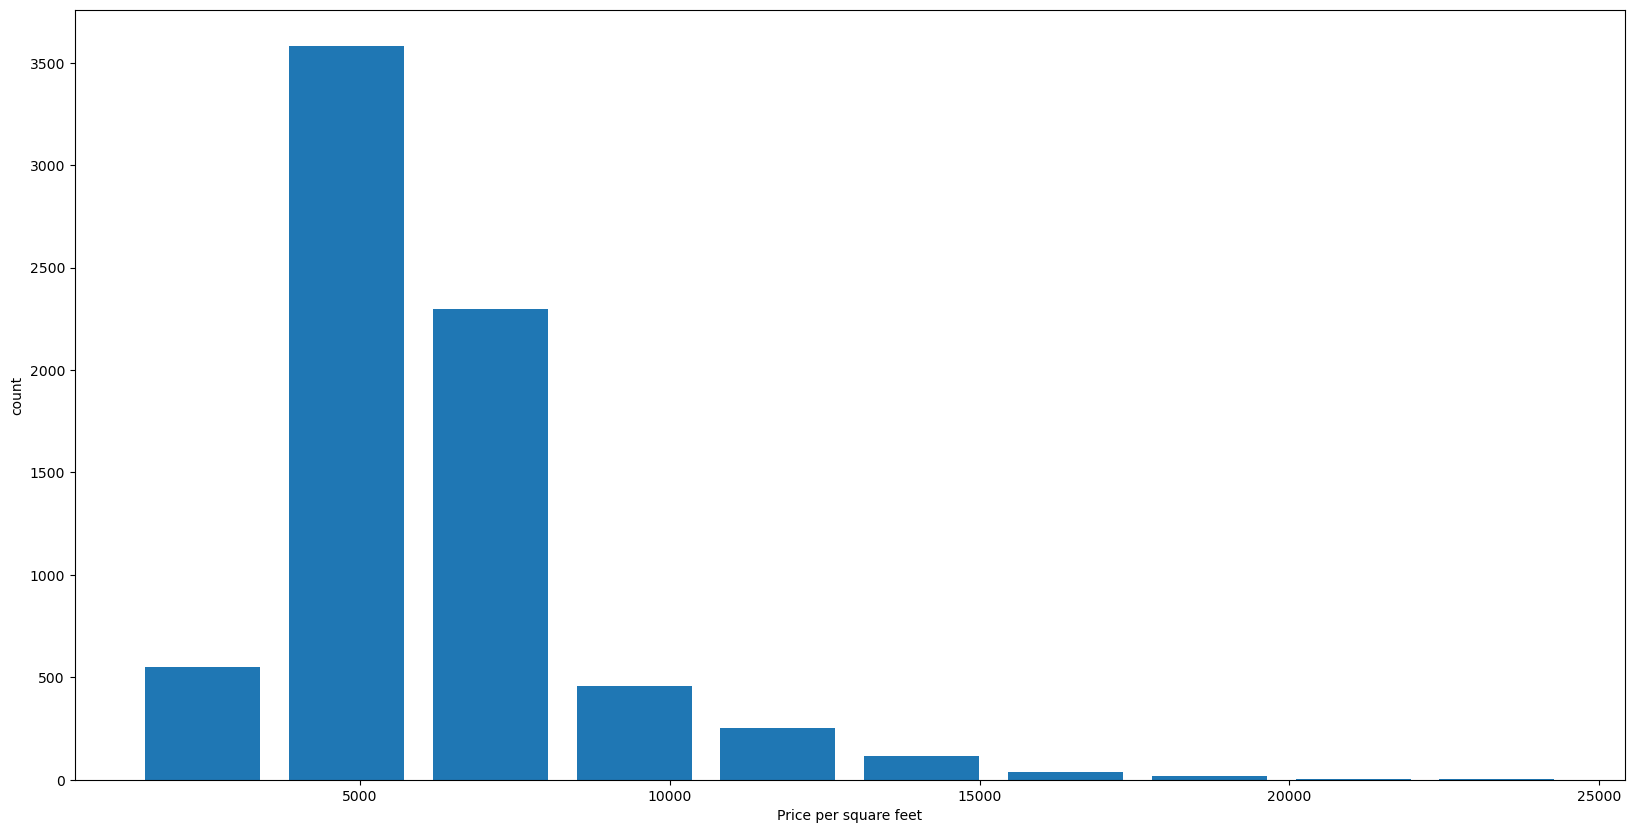

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist( df8.price_per_sqft , rwidth=0.8 )
plt.xlabel('Price per square feet')
plt.ylabel( 'count' )


# this looks like normal distribution (bell curve)

In [42]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
df8.groupby(df8['bath']).agg('count')

,location,size,total_sqft,price,bhk,price_per_sqft
bath,,,,,,
1.0,568,568,568,568,568,568
2.0,4188,4188,4188,4188,4188,4188
3.0,1763,1763,1763,1763,1763,1763
4.0,501,501,501,501,501,501
5.0,175,175,175,175,175,175
6.0,81,81,81,81,81,81
7.0,16,16,16,16,16,16
8.0,13,13,13,13,13,13
9.0,7,7,7,7,7,7


In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

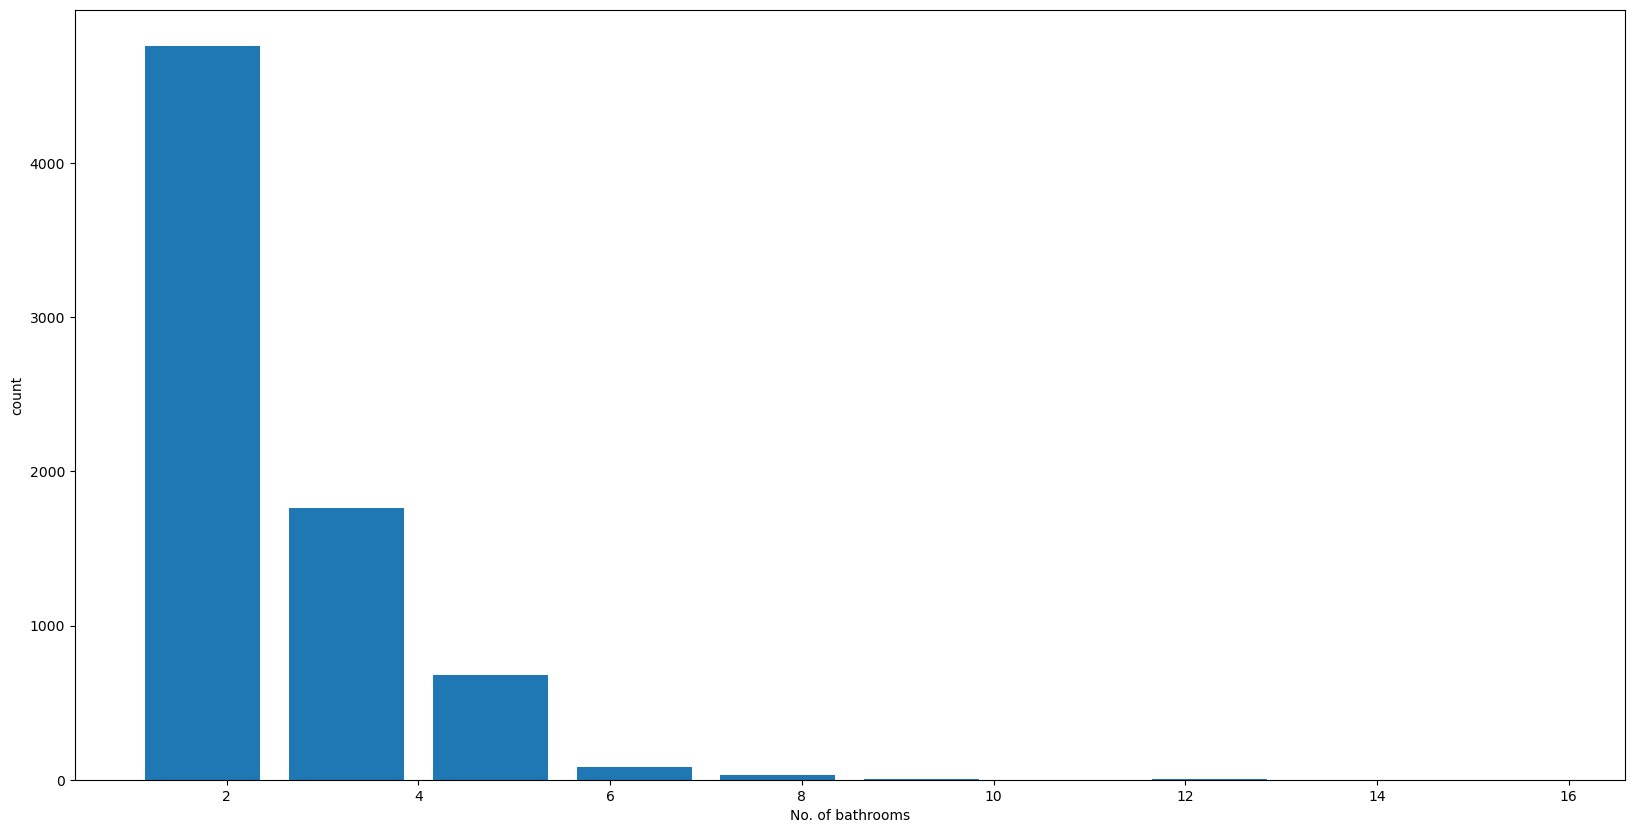

In [45]:
plt.hist( df8.bath , rwidth=0.8 )
plt.xlabel('No. of bathrooms')
plt.ylabel('count')

In [46]:
# lets remove the data in which bathrooms are more than bedroom + 2 .Remove those data :

df8[df8.bath > df8.bhk+2 ]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df8.shape

(7317, 7)

In [48]:
df9 = df8[ df8.bath < df8.bhk+2 ]
df9.shape

(7239, 7)

In [49]:
df10 = df9.drop( ['size','price_per_sqft'] , axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [50]:
df10.shape

# We have finally cleaned up our data and Now we train the dataset.

(7239, 5)

In [60]:
df10.groupby('location')['location'].agg('count')

location
1st Block Jayanagar             7
1st Phase JP Nagar             16
2nd Phase Judicial Layout       8
2nd Stage Nagarbhavi            4
5th Block Hbr Layout            6
                             ... 
Yelahanka                      86
Yelahanka New Town             24
Yelenahalli                     8
Yeshwanthpur                   37
other                        1126
Name: location, Length: 241, dtype: int64

In [62]:
# as the location is in the text category. we will apply one hot encoding and create dummies

dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# we have learnt that to avoid dummy variable trap we will drop one column. (lets drop 'other' column)

df11 = pd.concat( [df10, dummies.drop('other' , axis='columns')] , axis='columns' )
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df12 = df11.drop('location' , axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df12.shape

(7239, 244)

In [67]:
# Now ,lets split the features and target (price)

X = df12.drop( 'price' , axis='columns')
Y = df12.price

In [68]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [71]:
# Now , lets split the train dataset and test datset with size of 20%

from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size=0.2 , random_state = 10 )

In [72]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit( X_train , Y_train )
lr_clf.score( X_test , Y_test )

0.8629132245229442

In [74]:
# Now , lets try different combinations of train-test dataset using K fold cross method :
# shufflesplit will randomize the sample ,such that each of the fold has distributed dataset

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit( n_splits=5 , test_size=0.2 , random_state=0 )
cross_val_score( LinearRegression() , X , Y , cv=cv )

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [78]:
# lets try out different regression model using GridSearchCV and determine the best model to train dataset

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [89]:

def find_best_model( x , y ):
    
    # hyper parameter tunning :
    
    algos= {
        
        'linear_regression' : {
            'model' : LinearRegression() ,
            'params' : {
                'normalize':[True,False]
            }
        } ,
        
        'lasso' : {
            'model': Lasso() ,
            'params' : {
                    'alpha':[1,2] ,
                    'selection':['random','cyclic']
            }
        } ,
        
        'decision_tree':{
            'model':DecisionTreeRegressor() ,
            'params' : {
                'criterion' : ['mse' , 'friedman_mse'] ,
                'splitter' : ['best' , 'random']
            }
        }
    }
    
    score = []
    
    cv = ShuffleSplit( n_splits=5 , test_size=0.2 , random_state=0 )
    
    for algo_name , config in algos.items() :
        gs = GridSearchCV( config['model'] , config['params'] , cv=cv , return_train_score=False )
        gs.fit(x,y);
        score.append({
            'model':algo_name ,
            'best_score' : gs.best_score_ , 
            'best_params' : gs.best_params_ ,
        })
     
    return pd.DataFrame( score , columns=['model' , 'best_score' , 'best_params'])


In [92]:
find_best_model( X , Y )

# hence , linear Regression model is the best to predict as it has high score.

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726837,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.715394,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [93]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [94]:
np.where( X.columns=='Vijayanagar')[0][0]

233

In [97]:

def Predict_Price( location , sqft , bath , bhk ):
    
    loc_ind = np.where( X.columns==location )[0][0]
    
    # we are here creating a single row of instance by finding the index of given location and making it 1
    x = np.zeros( len(X.columns) )
    x[0] = sqft 
    x[1] = bath 
    x[2] = bhk
    
    if loc_ind>=0 :
        x[loc_ind] = 1
        
    return lr_clf.predict([x])[0]


In [99]:
Predict_Price( '1st Phase JP Nagar' , 1000 , 2 , 2 )

83.8657025831235

In [100]:
Predict_Price( '1st Phase JP Nagar' , 1000 , 3 , 3 )

86.08062284987108

In [101]:
Predict_Price( 'Indira Nagar' , 1000 , 3 , 3 )

195.52689759854718

In [102]:
Predict_Price( 'Indira Nagar' , 1000 , 2 , 2 )

193.3119773317996

In [ ]:
# The model works fine !

In [104]:
# Now ,lets export to a pickle file :

import pickle
with open('Bengaluru_home_price_predicting_model.pickle' , 'wb' ) as f :
    pickle.dump( lr_clf , f )

In [108]:
# we need the column information and the way they are structured :
# we put it in a json file :

import json

columns = {
    'data_columns' : [ col.lower() for col in X.columns ]
}

with open( "Bengaluru_location_columns.json" , "w" ) as f :
    f.write( json.dumps(columns) )
